# CSYE 7230: Assignment 1

Submitted by: Rishabh Kaushick

# 1. Environment Setup (5%)

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading The Dataset

In [2]:
# Loading Fashion MNIST dataset
fashion_mnist_train = pd.read_csv('./data/fashion-mnist_train.csv')
fashion_mnist_test = pd.read_csv('./data/fashion-mnist_test.csv')

## Libraries Used & Their Versions

The following libraries have been used in this virtual environment:

In [3]:
# libraires & thier versions
!pip freeze

absl-py==2.0.0
aiofiles==23.2.1
aiohttp==3.9.3
aiosignal==1.3.1
altair==5.3.0
annotated-types==0.6.0
anyio==4.0.0
appnope==0.1.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
async-timeout==4.0.3
attrs==23.2.0
Babel==2.14.0
backcall==0.2.0
bayesian-optimization==1.4.3
beautifulsoup4==4.12.3
bleach==6.1.0
blis==0.7.11
cachetools==5.3.2
catalogue==2.0.10
category-encoders==2.6.3
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
cloudpathlib==0.16.0
cmdstanpy==1.2.5
colorama==0.4.6
comm==0.2.1
confection==0.1.4
contourpy==1.1.1
cramjam==2.8.1
cycler==0.12.1
cymem==2.0.8
dataclasses-json==0.6.4
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
distro==1.9.0
dnspython==2.6.1
en-core-web-sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl#sha256=86cc141f63942d4b2c5fcee06630fd6f904788d2f0ab005cce45aadb8fb73889
et-xmlfile==1.1.0
excepti

All of this code was executed on the 

# 2. Dataset Exploration (5%)

## Data Characteristics

In [4]:
# number of instances
print("Number of instances in Train:")
fashion_mnist_train.info()

print("\nNumber of instances in Test:")
fashion_mnist_test.info()

Number of instances in Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB

Number of instances in Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [5]:
fashion_mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# understanding the labels
fashion_mnist_train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

Based on the information provided in the data description, the label numbers correspond to the following clothing items:
<table>
  <tr>
    <th>Label</th>
    <th>Clothing</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/ Top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [7]:
fashion_mnist_train.min()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [8]:
fashion_mnist_train.max()

label         9
pixel1       16
pixel2       36
pixel3      226
pixel4      164
           ... 
pixel780    255
pixel781    255
pixel782    255
pixel783    255
pixel784    170
Length: 785, dtype: int64

From the above cells we can see that the pixel value of the image range from 0 to 255.

## Data Preprocessing

In [9]:
# converting the data frame to numpy array for easy manipulation
train_np_array = np.array(fashion_mnist_train, dtype = 'float32')
test_np_array = np.array(fashion_mnist_test, dtype = 'float32')

### Normalizing Data

Below are two preprocessing steps:
1. Split the attributes (x) and the label (y)
2. Normalize the pixel values (instead of 0 to 255 --> 0 to 1)

In [10]:
# spliting x train and y train & normalizing x train
x_train = train_np_array[:,1:]/255
y_train = train_np_array[:,0]

# spliting x test and y test & normalizing x test
x_test= test_np_array[:,1:]/255
y_test=test_np_array[:,0]

### Train & Validation Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=2315)
print(f'Number of rows in x_train --> {len(x_train)} & in the x_validate --> {len(x_validate)}')

Number of rows in x_train --> 48000 & in the x_validate --> 12000


## Visualizing Sample Images

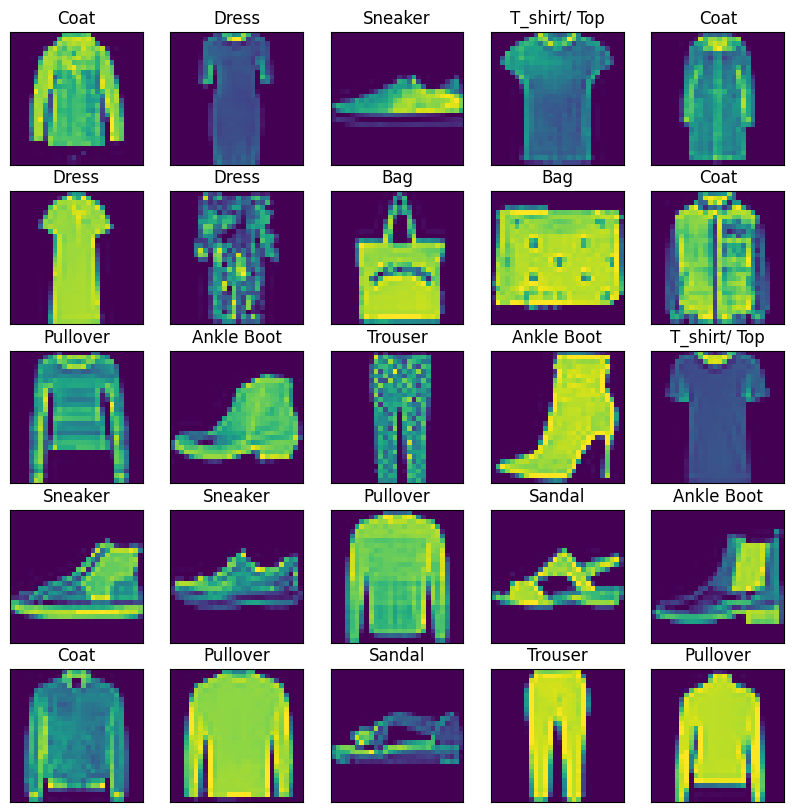

In [13]:
class_names = ['T_shirt/ Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure(figsize=(10, 10))
# plotting the first 25 images with 5x5 subplots
for i in range(25):
    plt.subplot(5, 5, i + 1)
    # no need for any x or y labels (ticks)
    plt.xticks([])
    plt.yticks([])
    # no need for a grid
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    # getting the label number
    label_index = int(y_train[i])
    # displaying the corresponding clothing class name
    plt.title(class_names[label_index])
plt.show()

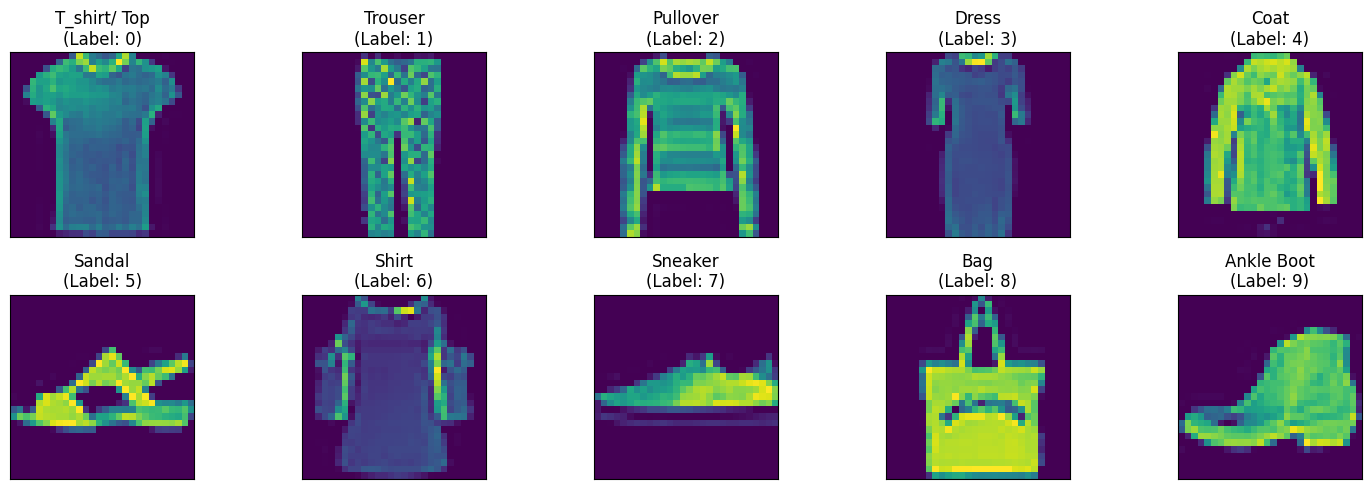

In [14]:
plt.figure(figsize=(15, 5))

# Creating a dict to keep track of the labels we've seen
seen_labels = {}

# Looping through the dataset until we find one example of each label
for i in range(len(x_train)):
    label = int(y_train[i])
    # if it is not present, let's add it to the dictionary
    if label not in seen_labels and len(seen_labels) < 10:
        seen_labels[label] = i
    # if all 10 labels are found, break out
    if len(seen_labels) == 10:
        break

# Plotting one image from each class
for idx, (label, image_idx) in enumerate(sorted(seen_labels.items())):
    plt.subplot(2, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[image_idx].reshape((28,28)))
    plt.title(f'{class_names[label]}\n(Label: {label})')

plt.tight_layout()
plt.show()

# 3. Basic CNN Model Design and Training (25%)

- Build a basic CNN model with:
  - A convolutional layer followed by max-pooling.
  - Additional convolutional layers as needed.
  - A fully connected (dense) layer and an output layer with 10 units (softmax activation).
- Use ReLU activation for hidden layers.
- Compile the model with a suitable loss function (e.g., categorical crossentropy) and optimizer (e.g., Adam or SGD).
- Train the model for at least 10 epochs, tracking training/validation accuracy and loss.

## Data Preprocessing For CNN Model

Let's see the shape of our train, validate and test:

In [15]:
x_train.shape

(48000, 784)

In [17]:
x_validate.shape

(12000, 784)

In [16]:
x_test.shape

(10000, 784)

From the above we can see that the original shape of the x_train is (48000, 784) & x_validate is (12000, 784).

CNN models require input data to be in the following dimension:

_Image Shape =(number of samples, m, n, number of color channels)_

Where:
- _m, n_ – represent the image in a _m_*_n_ matrix.
In our case _m_ and _n_ are both 28 (since we have 28 * 28 pixels)
- _number of color channels_ – in our case we have only 1 color channel. Sometimes images have 3 color channels, red, green and blue, for each pixel. In such cases this value will be three.


In [18]:
image_shape = (28, 28, 1)

In [19]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [20]:
print(f'x train shape: {x_train.shape}')
print(f'x validate shape: {x_validate.shape}')
print(f'x test shape: {x_test.shape}')

x train shape: (48000, 28, 28, 1)
x validate shape: (12000, 28, 28, 1)
x test shape: (10000, 28, 28, 1)


## Baseline CNN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [22]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output: instead of 28*28 now it get divided by 2 --> 14*14
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])


# 4. Experimentation with Architectures (30%)

- Modify the CNN architecture to include:
  - Different numbers of convolutional layers or filters.
  - Use of dropout layers for regularization.
  - Batch normalization layers for improved training stability.
- Train each variation and document the impact on performance.

# 5. Model Evaluation and Comparison (20%)

# 6. Analysis and Insights (10%)